# Welcome to the final project!
In this notebook you will be asked to use singular value decomposition and SVM to classify images. We will be working with the MNIST numbers dataset, where training data consist of pictures of digits, and the target value is the digit itself.

First, we import the necessary libraries.

In [58]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Now, we read both training and test dataset as arrays. 

In [59]:
data = np.load('mnist.npz')
X_test_total, X_train_total, y_train_total, y_test_total = data['x_test'], data['x_train'], data['y_train'], data['y_test']

Let's select two digits that we will be learning to separate, for example 3 and 8.

In [60]:
num1, num2 = 3, 8

Let us form the lists of indices i such that the target of i-th object of our training data is either num1 or num2. Do the same for the test dataset.

In [61]:
train_indx = [y == num1 or y == num2 for y in y_train_total] 
test_indx = [y == num1 or y == num2 for y in y_test_total] # your code here

Form new arrays consisting of the data with the target values num1 and num2 only. 

In [62]:
X_train, y_train = X_train_total[train_indx], y_train_total[train_indx]
X_test, y_test = X_test_total[test_indx], y_test_total[test_indx] # your code here

The following two cells ensure automatic grading.

In [14]:
import sys
sys.path.append("..")

import grading
grader = grading.Grader(assignment_key="5QcKcr06RZWNXOR6ZubzOg", 
                      all_parts=["EGrPV", "LtYil", "otUqA", "o4nIb", "rZkTW", "keYiw"])

In [15]:
# token expires every 30 min
COURSERA_TOKEN ='cy2OiXWjMTO8RT6K' # YOUR COURSERA TOKEN HERE (can be found in Programming section)
COURSERA_EMAIL ='badapplesweetie@gmail.com' # YOUR COURSERA EMAIL HERE

## Looking at the data

Let us check the sizes of the datasets and the shape of one image.

In [63]:
print('Data shapes: ')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

Data shapes: 
X_train:  (11982, 28, 28)
y_train:  (11982,)
X_test:  (1984, 28, 28)
y_test:  (1984,)


In [64]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

n_train, n_test

(11982, 1984)

In [65]:
print('Shape of one item: ')
print(X_train[0].shape)

Shape of one item: 
(28, 28)


Train data are images of digits.

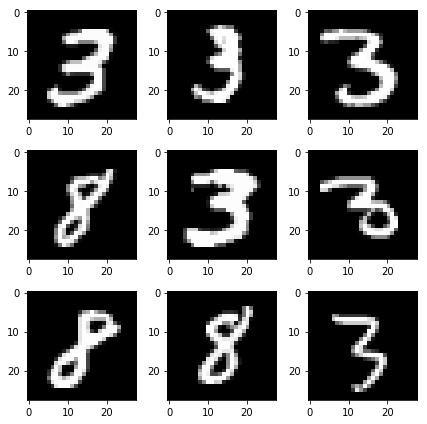

In [66]:
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):  
    plt.subplot(b, a, i+1)
    plt.imshow(X_train[i], cmap='gray')
plt.tight_layout()
plt.show()

Target values are numbers.

In [67]:
y_train[:9]

array([3, 3, 3, 8, 3, 3, 8, 8, 3], dtype=uint8)

## Task 1 (1 point)
Now our data is 3-dimensional of shape (number of images, n_pixels, n_pixels). To work with PCA and SVM we need to flatten the images by turning each of them into an array of shape (n_pixels x n_pixels, ).

In [68]:
def flatten_image(X):
    return X.reshape(X.shape[0],-1)# your code here

In [69]:
X_train_flat = flatten_image(X_train) # np.array([flatten_image(img) for img in X_train])
X_test_flat = flatten_image(X_test) # your code here
X_test_flat.shape, X_test_flat.shape

((1984, 784), (1984, 784))

PCA works best when the data is scaled (think, why?), so let's scale our data. We will use [StandartScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for it. Note, that scaling replaces a collection of vectors x by the collection of the vectors $x' = (x-M)/D$, where $M$ is the mean vector of
the sample, $D$ is the vector of standard deviations of all components of the vectors, and the division is component-wise. So, the scaled collection has the same size as the original one, and each column has 0 mean and unit standard deviation.


In [70]:
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

## Question 1

Please write your answer on the impact of scaling below. Why does scaling help PCA? If your idea need some computer experiments for confirmation (say, training and accuracy calculations  with non-scaled data), please provide the code here as well.

***Your answer here.***

#your code here

__If we do not scaling the data before passing it to PCA, it will give more emphasis to those variables having higher variances than to those variables with very low variances while identifying the right principle component.__

__If we scalling it, it will provide a fair comparison between the explained variance in the dataset.__

Now, we call PCA and reduce the number of components for each vector. 

In [71]:
pca = PCA(n_components=128, random_state=42)
X_train_flat = pca.fit_transform(X_train_flat)

In [72]:
X_test_flat = pca.transform(X_test_flat)

In [73]:
X_test_flat.shape, X_test_flat.shape

((1984, 128), (1984, 128))

## Question 2

What is the ratio of the memory used for the data `compressed' by PCA and the one used for the original data?

***Your answer here.***

__The ratio of memory used for data compressed by PCA and original data is approximately 12269680/9394016=1.20__

Now, we use SVM with linear kernel to separate the two classes.

In [74]:
%%time
clf = LinearSVC(random_state=42)
clf.fit(X_train_flat, y_train) 

CPU times: user 3.01 s, sys: 0 ns, total: 3.01 s
Wall time: 3.01 s


Now, let us make the predictions and calculate the accuracy, that is, the ratio of the true predictions to the test sample size.  Use [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) as the quality metric here.

$$accuracy(y\_true, y\_pred) = \frac{1}{n}\sum_{i=1}^n [y\_true_i=y\_pred_i],$$ where $[a=b]=1$, if $a=b$, and $0$ otherwise.

In [75]:
y_pred = clf.predict(X_test_flat)# your code here
acc = accuracy_score(y_test, y_pred)# your code here
print("Test accuracy: ", acc)

Test accuracy:  0.96622983871


In [32]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("EGrPV", acc)

In [33]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


## Try it from your own input
Try to make your own dataset. You can either make a photo image of an ink-written digit or draw a digit using a graphical editor of your computer or smartphone. Note that the input picture has to be a white number on a black background, like the numbers in the MNIST dataset. It can be either in png or jpeg format. Replace the sample striwith your file name. 

In [76]:
from scipy import misc
from PIL import Image

In [83]:
image = Image.open('./8-4.png').convert('L')
new_image = image.resize((28, 28))
custom = np.array(new_image)
custom.shape

(28, 28)

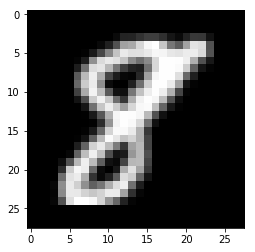

In [84]:
plt.imshow(custom, cmap='gray')
plt.show()

Re-shape your image and make a prediction. 

In [85]:
custom = flatten_image(custom).reshape(1, -1)
custom = scaler.transform(custom)
custom = pca.transform(custom)
custom.shape

(1, 128)

In [86]:
clf.predict(custom)

array([8], dtype=uint8)

## Question 3

Repeat the above digit recognition procedure with other 5 to 10 hand-written images. Do your experiments confirm the above accuracy estimate? How do you think, why they confirm (or not confirm) it?

***Your answer here.***

__I tried 12 more images, half "3", and half "8", it failed at one "3", and 5 "8". It certainly not confirm the above accuracy. Looks like the model is overfitting on the trainning data, we need to do cross-validation.__

## Task 2
Now let's try another approach explained [here](https://intranet.math.vt.edu/ugresearch/Lassiter_2012_2013.pdf) in Section 3. For each digit, we create a new matrix $A$ whose columns are flattened images of this digit. The first several (say, 10) columns of the matrix $U$ from SVD decomposition of $A$ represent a collection of "typical" images of this digit. Given an unrecognized flatten image, among average typical flattened images we find the closets one. Its target value is considered as a prediction for the target of the unrecognized image.

## SVD refesher
As you may recall from the lectures, SVD of a matrix $A$ is a decomposition:
$A = U \Sigma V^T,$ where $U$ and $V$ are orthogonal matrices. In this method we will be utilizing some properties of SVD.
Please note that due to large shapes of matrices the operations might take a while.

In [87]:
def getSingularVectorsLeft(matrix, number=10): # let's take first 10 numbers
    # return first _number_ columns of U from SVD of _matrix_
    return matrix[:,:number]

In [88]:
def getSingularImage(X_train, y_train, number):
    file_name = 'singular_matrix_' + str(number) + '.npy'
    try:
        u = np.load(file_name)
        print('load singular matrix from ' + file_name)
    except IOError:
        print('start finding singular matrix of ' + str(number))
        # find images whose target is _number_
        test_indx = [y == number for y in y_train]
        select_images = X_train[test_indx]

        m2 = select_images.shape[1] * select_images.shape[2]
        # A.shape = (784, n), 784=28px * 28px, n is the number of images
        A= np.zeros((m2, select_images.shape[0]))
        column = 0

        for image in select_images:
        # iteratively append new column to form matrix A
            A[:,column] = image.flatten()
            column += 1

        u, s, vh = svd(A, full_matrices=False)
        # A.shape (784, n), u.shape (784, 784), s.shape (n,), vh.shape (n, n), when full_matrices=True
        # A.shape (784, n), u.shape (784, n), s.shape (n,), vh.shape (n, n), when full_matrices=False
        np.save(file_name, u)

    # left_basis = # get left singular vectors
    left_basis=getSingularVectorsLeft(u, 36)
    return left_basis

Try it first on "0".

In [89]:
left_basis = getSingularImage(X_train_total, y_train_total, 0)

assert left_basis.shape, (784, 10)
print(left_basis.shape)

load singular matrix from singular_matrix_0.npy
(784, 36)


### Task 2.1 (1 point)
Plot first 9 singular images of the digit 0 taking columns of matrix U and reshaping them back into images 28x28. Use `numpy.reshape`.

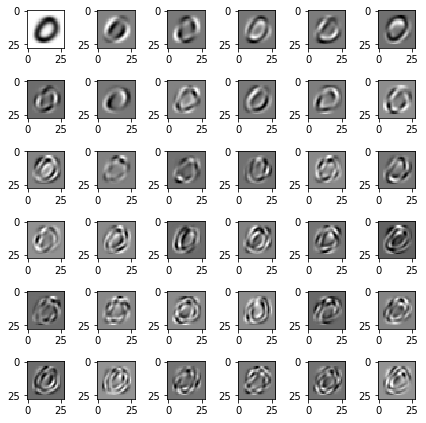

In [90]:
#singular images
plt.figure(figsize=(6,6))
a, b = 6, 6
for i in range(a*b):  
    plt.subplot(b, a, i+1)
    img = left_basis[:,i].reshape(28,28)# ith element of left basis reshaped back to 28x28
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

In [43]:
## GRADED PART, DO NOT CHANGE!
#9th image will be graded:
grader.set_answer("LtYil", img[:, 5:7].flatten())

In [44]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


## Question 4

Reflect on properties of the columns of $U_k$. What properties do you think are contained in each of them? Draw more singular images to help you make conclusions.

***Your answer here.***

__The left singular vectors $u_i$ form an orthonormal basis in the "image space" of a digit. Because we sort the columns of $U$ by the value of singular values from largest to smallest. We assume $u_1$ contains the most significant/important feature of the "digit matrix" from our dataset, and $u_2$ contains less, because the corresponding singular value is smaller, an so on for $u_3,\dots,u_m$. Thus we reduce the dimension from $\mathbb{R}^{m^2}$ to $\mathbb{R}^{10}$ by taking the first 10 columns as left basis, the assumption is the first 10 columns contains enough information to build a classifier.__

Now let's move on and obtain singular images for all numbers. The matrices $U_k$ from  [the article](https://intranet.math.vt.edu/ugresearch/Lassiter_2012_2013.pdf) are represented as `number_basis_matrices[k]`.
This might take a while to finish, feel free to add debug print in your function to know the progress.

In [91]:
# use getSingularImage funciton to get matrices for all numbers
number_basis_matrices = np.array([getSingularImage(X_train_total, y_train_total, i) for i in range(10)])
# print(number_basis_matrices.shape) # (10, 784, 10)

load singular matrix from singular_matrix_0.npy
load singular matrix from singular_matrix_1.npy
load singular matrix from singular_matrix_2.npy
load singular matrix from singular_matrix_3.npy
load singular matrix from singular_matrix_4.npy
load singular matrix from singular_matrix_5.npy
load singular matrix from singular_matrix_6.npy
load singular matrix from singular_matrix_7.npy
load singular matrix from singular_matrix_8.npy
load singular matrix from singular_matrix_9.npy


### Task 2.2 (1 point)
Plot the first singular image of each digit, similarly to the previous task.

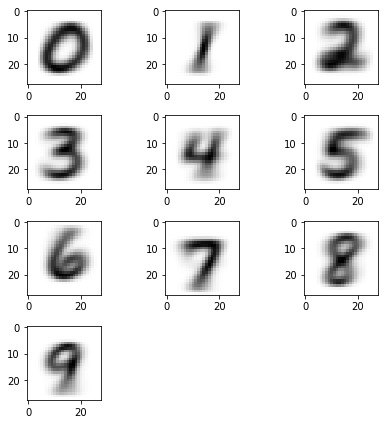

In [92]:
plt.figure(figsize=(6,6))
a, b = 3, 4
for i in range(10):  
    plt.subplot(b, a, i+1)
    img = number_basis_matrices[i,:,0].reshape(28, 28)# first column of U_k in number_basis_matrices[i] reshaped into 28x28 image
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

In [47]:
## GRADED PART, DO NOT CHANGE!
#last image (of digit 9) will be graded:
grader.set_answer("otUqA", img[:, 5:7].flatten())

In [48]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


In [94]:
dim = number_basis_matrices[0].shape[0]
# print(dim)

784


### Task 2.3 (1.5 points)

Here we calculate the new projection matrix for each $U_k$ to apply later in testing:
$pr = (I - U_k \cdot U_{k}^{T})$. Use `numpy.matmul` for matrix multiplication and `numpy.identity` to create an identity matrix. Please note that this operation might also take some time to finish.

In [95]:
# create an array of pr for each number
numeric_values = np.array([np.subtract(np.identity(number_basis_matrices[i].shape[0]), 
                                       np.matmul(number_basis_matrices[i], number_basis_matrices[i].transpose())) for i in range(10)])

# print(numeric_values.shape) # (10, 784, 784)

In [51]:
## GRADED PART, DO NOT CHANGE!
k = np.array([n[3:5, 3:13] for n in numeric_values])
grader.set_answer("o4nIb", k.flatten())

In [52]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


### Task 2.4 (1.5 points)
Implement function utilizing `numeric_values` matrices to predict labels for unknown images. Use `numpy.norm` and enumerate to iterate over numeric values.

In [97]:
def find_closest(test_value, numeric_values):
    stacked_test = test_value.reshape(-1, 1) # (784, 1)
    # find closest U_k to test_value using norm and return the target digit
    target = 0
    min_norm = None
    for num, projection in enumerate(numeric_values):
#         print(stacked_test.shape)
        norm = np.linalg.norm(np.matmul(projection, stacked_test))
        
        if min_norm is None or norm < min_norm:
            min_norm = norm
            target = num

    return target

In [98]:
# find array of predictions for test values and calculate accuracy in the cell below
# y_pred = np.array([find_closest(x, numeric_values) for x in X_test_total[:100]])
try:
    y_pred=np.load('svd_y_pred.npy')
except IOError:
    y_pred = []
    print("total data size" + str(X_test_total.shape[0]))
    counter = 0
    for x in X_test_total:
        if counter % 100 == 0:
            print('processing ' + str(counter))
        y_pred.append(find_closest(x, numeric_values))
        counter += 1
    np.save('svd_y_pred.npy', y_pred)
# print(y_pred.shape)

In [103]:
# print(y_test_total[:100])
acc = accuracy_score(y_test_total, y_pred)
# print(acc)

0.9485


In [100]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("rZkTW", acc)

In [57]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


## Additional task (2 points)
In the first task we trained Linear SVM to separate 3s and 8s. Here you can implement multiclass classification for _all_ numbers in `MNIST`. Use the same function LinearSVC for “one-vs-the-rest” multi-class strategy, see [the documentation](https://scikit-learn.org/stable/modules/svm.html#classification).  Follow the same steps from task 1: scaling, feature selection, training and testing. Is the accuracy of this method greater then the one calculated above?

**Note:** Use `random_state=42` for `PCA` and `LinearSVC`. Training `LinearSVC` on all the data might take a while, that's normal.

In [104]:
# flatten
X_train_total_flat = flatten_image(X_train_total) 
X_test_total_flat = flatten_image(X_test_total)
# print(X_train_total_flat.shape, X_test_total_flat.shape)
# Scandart Scaler
scaler = StandardScaler()
X_train_total_flat = scaler.fit_transform(X_train_total_flat)
X_test_total_flat = scaler.transform(X_test_total_flat)
# print(X_train_total_flat.shape, X_test_total_flat.shape)
# PCA
pca = PCA(n_components=128, random_state=42)
X_train_total_flat = pca.fit_transform(X_train_total_flat)
X_test_total_flat = pca.transform(X_test_total_flat)
print(X_train_total_flat.shape, X_test_total_flat.shape)

(60000, 128) (10000, 128)


In [7]:
%%time
# LinearSVC
clf = LinearSVC(random_state=42)
clf.fit(X_train_total_flat, y_train_total) 

CPU times: user 10min 9s, sys: 364 ms, total: 10min 9s
Wall time: 10min 9s


In [8]:
y_pred_pca = clf.predict(X_test_total_flat)# your code here

In [10]:
acc = accuracy_score(y_test_total, y_pred_pca)# calculate accuracy
print("Test accuracy: ", acc)

Test accuracy:  0.9136


In [14]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("keYiw", acc)

In [15]:
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!
